📁 Please upload your CSV file


Saving 3. Predict Disease Outcome Based on Genetic and Clinical Data.csv to 3. Predict Disease Outcome Based on Genetic and Clinical Data.csv
✅ Dataset loaded successfully!

🔍 Data Preview:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250         

<ipython-input-21-4fcf7ea5b753>:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-21-4fcf7ea5b753>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi


📋 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

✅ Accuracy Score: 0.9649


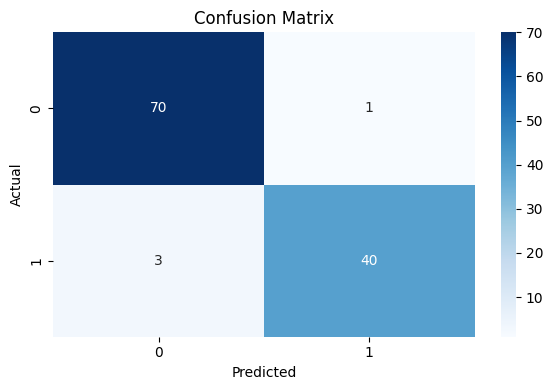

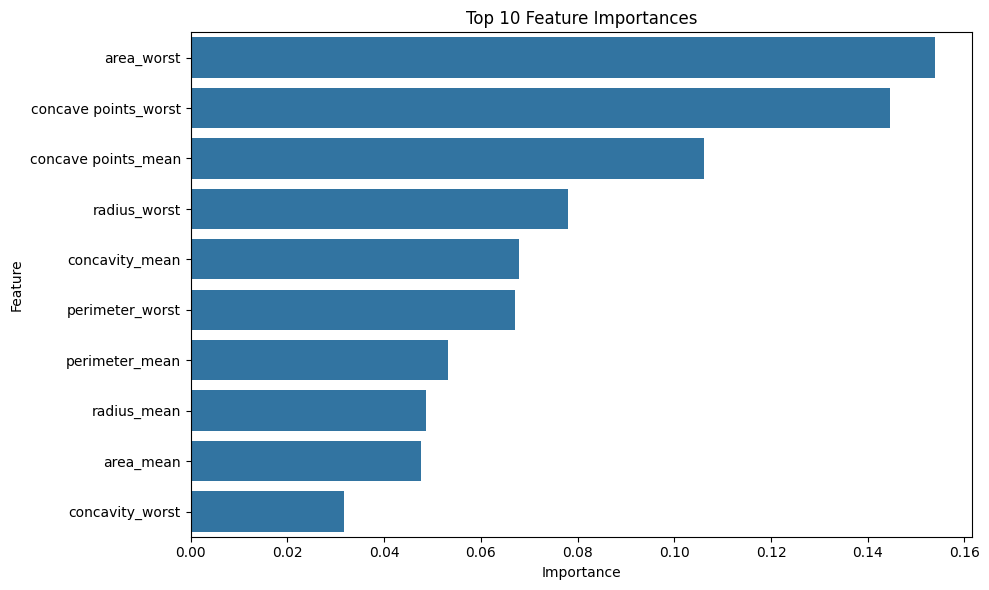

In [21]:
# === 1. Install & Import Required Libraries ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import files
import io

# === 2. Upload File in Google Colab ===
print("📁 Please upload your CSV file")
uploaded = files.upload()

file_path = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_path]))
print("✅ Dataset loaded successfully!")

# === 3. Quick Data Preview ===
print("\n🔍 Data Preview:")
print(df.head())
print("\n📊 Data Info:")
print(df.info())

# === 4. Drop Irrelevant or Empty Columns (if any) ===
df.drop(columns=["id", "Unnamed: 32"], inplace=True, errors='ignore')

# === 5. Handle Missing Values ===
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

# === 6. Encode Categorical Variables ===
le = LabelEncoder()
if 'diagnosis' in df.columns:
    df['diagnosis'] = le.fit_transform(df['diagnosis'])  # M = 1, B = 0

# === 7. Split Features and Target ===
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# === 8. Split into Train/Test Sets ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === 9. Feature Scaling ===
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# === 10. Train Random Forest Classifier ===
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# === 11. Model Evaluation ===
y_pred = model.predict(X_test)

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

print(f"✅ Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")

# === 12. Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# === 13. Feature Importance ===
importances = model.feature_importances_
features = X.columns
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importance[:10], y=feat_importance.index[:10])
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
